In [1]:
# fashion-mnist 데이터 불러오기
from tensorflow.keras import datasets
data = datasets.fashion_mnist
(train_x,train_y), (test_x,test_y) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
train_x.shape,train_y.shape, test_x.shape,test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

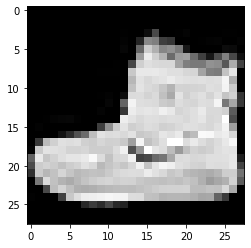

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0],'gray')
plt.show()

In [5]:
train_y[0]

9

In [6]:
# 데이터 분리
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, random_state=10)

In [7]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((45000, 28, 28), (15000, 28, 28), (45000,), (15000,))

In [10]:
# 4차원으로 변환
train_x = train_x.reshape(-1,28,28,1)
valid_x = valid_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [11]:
# 정규화
train_x = train_x/255
valid_x = valid_x/255
test_x = test_x/255

In [12]:
# 레이블 인코딩
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)
test_y = to_categorical(test_y)

### CNN 구현

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
# 랜덤시드값
tf.random.set_seed(14)
# 시퀀셜객체생성
model = Sequential()

# 합성곱레이어
# 파라미터
# feature map의 차원
# 필터의 크기(튜플) == 커널사이즈
# padding : same 입력과 출력형태를 동일하게
# activation : 활성화함수
# input_shape : 입력데이터 차원
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
# 풀링레이어
# pool_size : 풀링레이어에서 사용할 커널사이즈
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2)))

# 평탄화
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# 출력레이어
model.add(Dense(10, activation='softmax'))

# 모델의 구조확인
#model.summary()

# 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# 학습
history = model.fit(train_x, train_y, epochs=30, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/30
900/900 [==============================] - 17s 18ms/step - loss: 0.7846 - acc: 0.7150 - val_loss: 0.3913 - val_acc: 0.8627
Epoch 2/30
900/900 [==============================] - 15s 16ms/step - loss: 0.3613 - acc: 0.8710 - val_loss: 0.3407 - val_acc: 0.8783
Epoch 3/30
900/900 [==============================] - 14s 16ms/step - loss: 0.3124 - acc: 0.8868 - val_loss: 0.3113 - val_acc: 0.8895
Epoch 4/30
900/900 [==============================] - 14s 15ms/step - loss: 0.2808 - acc: 0.8994 - val_loss: 0.3111 - val_acc: 0.8899
Epoch 5/30
900/900 [==============================] - 13s 15ms/step - loss: 0.2574 - acc: 0.9080 - val_loss: 0.2840 - val_acc: 0.8959
Epoch 6/30
900/900 [==============================] - 13s 14ms/step - loss: 0.2378 - acc: 0.9144 - val_loss: 0.2643 - val_acc: 0.9033
Epoch 7/30
900/900 [==============================] - 13s 14ms/step - loss: 0.2216 - acc: 0.9180 - val_loss: 0.2641 - val_acc: 0.9031
Epoch 8/30
900/900 [==============================] - 13s 14ms

In [18]:
# 학습된 모델로 테스트데이터 평가
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4247 - acc: 0.9059


[0.4247048795223236, 0.9059000015258789]

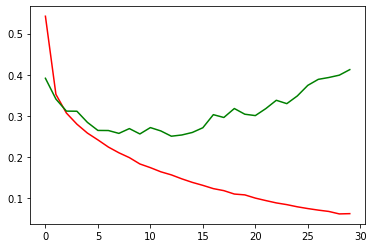

In [19]:
plt.plot(history.history['loss'],c='r')
plt.plot(history.history['val_loss'],c='g')
plt.show()

### 성능평가

In [20]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
import numpy as np
pred = model.predict(test_x)
confusion_matrix(np.argmax(test_y,axis=1), np.argmax(pred,axis=1))

array([[839,   2,  12,  13,   3,   0, 117,   0,  13,   1],
       [  0, 984,   3,   7,   3,   0,   3,   0,   0,   0],
       [ 22,   1, 891,   5,  30,   0,  49,   0,   2,   0],
       [ 18,   7,   8, 908,  22,   0,  32,   0,   4,   1],
       [  2,   0, 104,  30, 807,   1,  56,   0,   0,   0],
       [  0,   0,   0,   0,   0, 971,   0,  20,   3,   6],
       [101,   2,  65,  22,  47,   0, 754,   0,   9,   0],
       [  0,   0,   0,   0,   0,   5,   0, 971,   0,  24],
       [  5,   2,   3,   3,   2,   3,   6,   2, 974,   0],
       [  0,   0,   0,   0,   0,   4,   1,  35,   0, 960]], dtype=int64)

In [21]:
# 실제 셔츠인데, 티셔츠라고 모델이 잘못 예측한게 101개
# 실제 티셔츠인데, 모델이 셔츠라고 잘못 예측한게 117개

In [22]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_y,axis=1), np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.89      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.88      0.81      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.75      0.75      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### 성능개선

In [23]:
# Regularizer
# L2 적용 (규제함수)

from tensorflow.keras.regularizers import l2
# 랜덤시드값
tf.random.set_seed(14)
# 시퀀셜객체생성
model = Sequential()

# 합성곱레이어
# 파라미터
# feature map의 차원
# 필터의 크기(튜플) == 커널사이즈
# padding : same 입력과 출력형태를 동일하게
# activation : 활성화함수
# input_shape : 입력데이터 차원
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
# 풀링레이어
# pool_size : 풀링레이어에서 사용할 커널사이즈
model.add(MaxPool2D((2,2)))

# 규제함수 추가
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D((2,2)))

# 평탄화
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# 출력레이어
model.add(Dense(10, activation='softmax'))

# 모델의 구조확인
#model.summary()

# 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# 학습
history = model.fit(train_x, train_y, epochs=30, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/30
900/900 [==============================] - 16s 17ms/step - loss: 0.8023 - acc: 0.7168 - val_loss: 0.4179 - val_acc: 0.8641
Epoch 2/30
900/900 [==============================] - 15s 16ms/step - loss: 0.3889 - acc: 0.8694 - val_loss: 0.3750 - val_acc: 0.8732
Epoch 3/30
900/900 [==============================] - 15s 16ms/step - loss: 0.3435 - acc: 0.8838 - val_loss: 0.3349 - val_acc: 0.8885
Epoch 4/30
900/900 [==============================] - 14s 15ms/step - loss: 0.3119 - acc: 0.8942 - val_loss: 0.3248 - val_acc: 0.8930
Epoch 5/30
900/900 [==============================] - 13s 14ms/step - loss: 0.2897 - acc: 0.9058 - val_loss: 0.3112 - val_acc: 0.8935
Epoch 6/30
900/900 [==============================] - 13s 14ms/step - loss: 0.2718 - acc: 0.9094 - val_loss: 0.2962 - val_acc: 0.9015
Epoch 7/30
900/900 [==============================] - 13s 14ms/step - loss: 0.2584 - acc: 0.9119 - val_loss: 0.3016 - val_acc: 0.8969
Epoch 8/30
900/900 [==============================] - 13s 14ms

### Regularizer, BatchNormalization, Dropout 적용

In [24]:
# Regularizer
# L2 적용 (규제함수)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation, BatchNormalization, Dropout
# 랜덤시드값
tf.random.set_seed(14)
# 시퀀셜객체생성
model = Sequential()

# 합성곱레이어
# 파라미터
# feature map의 차원
# 필터의 크기(튜플) == 커널사이즈
# padding : same 입력과 출력형태를 동일하게
# activation : 활성화함수
# input_shape : 입력데이터 차원
# batchnormalization추가 (활성화함수 분리)
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# 풀링레이어
# pool_size : 풀링레이어에서 사용할 커널사이즈
model.add(MaxPool2D((2,2)))
# dropout 적용 (0.2~0.3)
model.add(Dropout(0.2))

# 규제함수 추가
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

# 평탄화
model.add(Flatten())
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 출력레이어
model.add(Dense(10, activation='softmax'))

# 모델의 구조확인
#model.summary()

# 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# 학습
history = model.fit(train_x, train_y, epochs=30, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/30
900/900 [==============================] - 36s 39ms/step - loss: 0.8715 - acc: 0.7297 - val_loss: 0.3895 - val_acc: 0.8663
Epoch 2/30
900/900 [==============================] - 36s 40ms/step - loss: 0.4277 - acc: 0.8553 - val_loss: 0.3329 - val_acc: 0.8858
Epoch 3/30
900/900 [==============================] - 36s 40ms/step - loss: 0.3790 - acc: 0.8689 - val_loss: 0.3273 - val_acc: 0.8881
Epoch 4/30
900/900 [==============================] - 35s 39ms/step - loss: 0.3514 - acc: 0.8798 - val_loss: 0.3084 - val_acc: 0.8907
Epoch 5/30
900/900 [==============================] - 36s 40ms/step - loss: 0.3343 - acc: 0.8864 - val_loss: 0.3057 - val_acc: 0.8929
Epoch 6/30
900/900 [==============================] - 36s 40ms/step - loss: 0.3264 - acc: 0.8881 - val_loss: 0.2916 - val_acc: 0.8998
Epoch 7/30
900/900 [==============================] - 35s 39ms/step - loss: 0.3100 - acc: 0.8941 - val_loss: 0.2845 - val_acc: 0.9004
Epoch 8/30
900/900 [==============================] - 35s 39ms

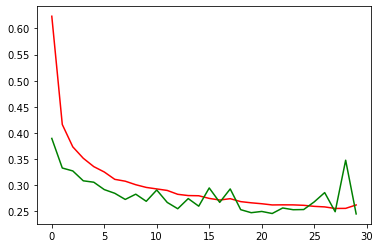

In [25]:
# 셋다 적용후 loss 비교
plt.plot(history.history['loss'],c='r')
plt.plot(history.history['val_loss'],c='g')
plt.show()

In [26]:
# 셋다 적용후 분류보고서 출력
pred = model.predict(test_x)
print(classification_report(np.argmax(test_y,axis=1), np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.87      0.89      0.88      1000
           3       0.89      0.93      0.91      1000
           4       0.87      0.89      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Early Stopping
* monitor : 모니터링(val_loss)
* patience : 성능이 증가하지 않는 epochs의 허용 횟수

In [28]:
# 랜덤시드값
tf.random.set_seed(14)
# 시퀀셜객체생성
model = Sequential()

# 합성곱레이어
# 파라미터
# feature map의 차원
# 필터의 크기(튜플) == 커널사이즈
# padding : same 입력과 출력형태를 동일하게
# activation : 활성화함수
# input_shape : 입력데이터 차원
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
# 풀링레이어
# pool_size : 풀링레이어에서 사용할 커널사이즈
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2)))

# 평탄화
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# 출력레이어
model.add(Dense(10, activation='softmax'))

# 모델의 구조확인
#model.summary()

# 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, verbose=1)
# 학습
history = model.fit(train_x, train_y, epochs=50, batch_size=50, validation_data=(valid_x, valid_y), callbacks=[es])

Epoch 1/50
900/900 [==============================] - 16s 17ms/step - loss: 0.7846 - acc: 0.7150 - val_loss: 0.3913 - val_acc: 0.8627
Epoch 2/50
900/900 [==============================] - 15s 17ms/step - loss: 0.3613 - acc: 0.8710 - val_loss: 0.3407 - val_acc: 0.8783
Epoch 3/50
900/900 [==============================] - 15s 16ms/step - loss: 0.3124 - acc: 0.8868 - val_loss: 0.3113 - val_acc: 0.8895
Epoch 4/50
900/900 [==============================] - 14s 15ms/step - loss: 0.2808 - acc: 0.8994 - val_loss: 0.3111 - val_acc: 0.8899
Epoch 5/50
900/900 [==============================] - 13s 14ms/step - loss: 0.2574 - acc: 0.9080 - val_loss: 0.2840 - val_acc: 0.8959
Epoch 6/50
900/900 [==============================] - 13s 14ms/step - loss: 0.2378 - acc: 0.9144 - val_loss: 0.2643 - val_acc: 0.9033
Epoch 7/50
900/900 [==============================] - 13s 14ms/step - loss: 0.2216 - acc: 0.9180 - val_loss: 0.2641 - val_acc: 0.9031
Epoch 8/50
900/900 [==============================] - 13s 15ms

### Model Checkpoint
* Early Stopping에 의해서 학습이 중지된 상태가 최적의 상태는 아님
* validation 성능이 가장 좋은 상태의 모델을 저장

In [29]:
# 랜덤시드값
tf.random.set_seed(14)
# 시퀀셜객체생성
model = Sequential()

# 합성곱레이어
# 파라미터
# feature map의 차원
# 필터의 크기(튜플) == 커널사이즈
# padding : same 입력과 출력형태를 동일하게
# activation : 활성화함수
# input_shape : 입력데이터 차원
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
# 풀링레이어
# pool_size : 풀링레이어에서 사용할 커널사이즈
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2)))

# 평탄화
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# 출력레이어
model.add(Dense(10, activation='softmax'))

# 모델의 구조확인
#model.summary()

# 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, verbose=1)
# ModelCheckpoint
mc = tf.keras.callbacks.ModelCheckpoint('bestmodel.cp', monitor='val_loss', mode='min', save_best_only=True)
# 학습
history = model.fit(train_x, train_y, epochs=50, batch_size=50, validation_data=(valid_x, valid_y), callbacks=[es,mc])

Epoch 1/50
900/900 [==============================] - 16s 17ms/step - loss: 0.7846 - acc: 0.7150 - val_loss: 0.3913 - val_acc: 0.8627
INFO:tensorflow:Assets written to: bestmodel.cp\assets
Epoch 2/50
900/900 [==============================] - 15s 17ms/step - loss: 0.3613 - acc: 0.8710 - val_loss: 0.3407 - val_acc: 0.8783
INFO:tensorflow:Assets written to: bestmodel.cp\assets
Epoch 3/50
900/900 [==============================] - 15s 16ms/step - loss: 0.3124 - acc: 0.8868 - val_loss: 0.3113 - val_acc: 0.8895
INFO:tensorflow:Assets written to: bestmodel.cp\assets
Epoch 4/50
900/900 [==============================] - 14s 16ms/step - loss: 0.2808 - acc: 0.8994 - val_loss: 0.3111 - val_acc: 0.8899
INFO:tensorflow:Assets written to: bestmodel.cp\assets
Epoch 5/50
900/900 [==============================] - 13s 15ms/step - loss: 0.2574 - acc: 0.9080 - val_loss: 0.2840 - val_acc: 0.8959
INFO:tensorflow:Assets written to: bestmodel.cp\assets
Epoch 6/50
900/900 [==============================] - 1

* 가중치,옵티마이저를 포함하여 저장된 모델을 불러오기

In [30]:
new_model = tf.keras.models.load_model('bestmodel.cp')
# 모델의 구조
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [31]:
pred = new_model.predict(test_x)
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.87      0.86      1000
           3       0.92      0.91      0.91      1000
           4       0.87      0.87      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### 성능개선을 위한 방법(사후)
* 그래프를 그려서 확인
* Dropout
* EarlyStopping
* ModelCheckpoint


* 데이터 전처리
* 데이터를 더 수집